In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
precip_data = Session.query(measurement.date, measurement.prcp) .\
     filter (measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(precip_data)
precip_data_df.columns = ['Date', 'Precipitation']
precip_data_df = precip_data_df.set_index(['Date'])

precip_data_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [12]:
# Sort the dataframe by date
precip_data_df.sort_index(inplace=True, ascending=True)

precip_data_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [13]:
# drop N/A values
precip_data_df.dropna()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:xlabel='Date', ylabel='Inches'>

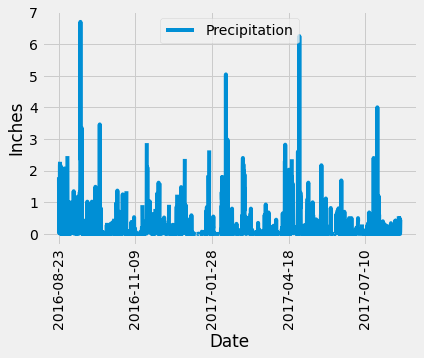

In [24]:
precip_data_df.plot(kind='line', y = 'Precipitation', ylabel = 'Inches', rot=90)

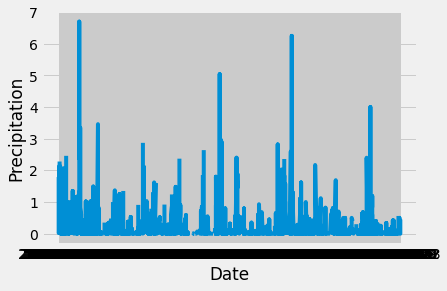

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_data_df['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()
# plt.xticks('Date', rotation = 'vertical')

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = precip_data_df['Precipitation'].mean()
median = precip_data_df['Precipitation'].median()
mode = precip_data_df['Precipitation'].mode()

print(f'The mean is {mean} inches.')
print(f'The median is {median} inches.')
print(f'THe mode is {mode}.')

The mean is 0.17727857496288899 inches.
The median is 0.02 inches.
THe mode is 0    0.0
Name: Precipitation, dtype: float64.


In [25]:
precip_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
total_stations = Session.query(station.station).count()
print(total_stations)

9


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_data = Session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()
station_data
     # filter (measurement.date >= query_date).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = Session.query(func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).\
    filter((measurement.station) == 'USC00519281').all()
most_active_station

[(85.0, 54.0, 71.66378066378067)]

<AxesSubplot:title={'center':'Observed Temperatures Frequency at USC00519281'}, ylabel='Frequency'>

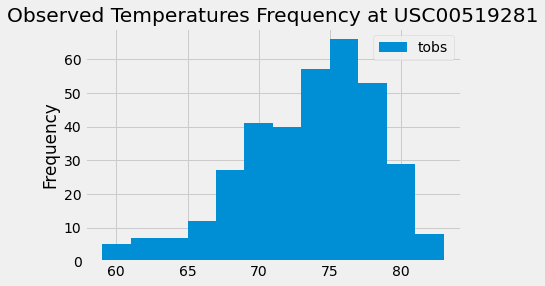

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp_data = Session.query(measurement.date, measurement.tobs) .\
    filter (measurement.station == 'USC00519281').\
    filter (measurement.date >= query_date).all()

most_active_temp_data_df = pd.DataFrame(most_active_temp_data)
most_active_temp_data_df.plot(kind='hist', title = 'Observed Temperature Frequency at USC00519281', bins = 12)


# Close session

In [ ]:
# Close Session
Session.close()